In [8]:
import pandas as pd
import numpy as np
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem

In [9]:
df_diols = pd.read_csv('../data/diols_ref.csv', index_col=0)

In [10]:
def compute_similarities(ref, rdkmols, metric='Tanimoto'):
    # ref and rdkmols are mol objects  from RDKit
    reffp = Chem.RDKFingerprint(ref)
    fps = [Chem.RDKFingerprint(x) for x in rdkmols]
    if metric == 'Tanimoto':
        return [DataStructs.FingerprintSimilarity(reffp, fp) for fp in fps]
    if metric == 'Dice':
        return [DataStructs.FingerprintSimilarity(reffp, fp, metric=DataStructs.DiceSimilarity) for fp in fps]
    if metric == 'Cosine':
        return [DataStructs.FingerprintSimilarity(reffp, fp, metric=DataStructs.CosineSimilarity) for fp in fps]
    if metric == 'Sokal':
        return [DataStructs.FingerprintSimilarity(reffp, fp, metric=DataStructs.SokalSimilarity) for fp in fps]
    if metric == 'Russel':
        return [DataStructs.FingerprintSimilarity(reffp, fp, metric=DataStructs.RusselSimilarity) for fp in fps]
    if metric == 'Dice':
        return [DataStructs.FingerprintSimilarity(reffp, fp, metric=DataStructs.DiceSimilarity) for fp in fps]
    if metric == 'Kulczynski':
        return [DataStructs.FingerprintSimilarity(reffp, fp, metric=DataStructs.KulczynskiSimilarity) for fp in fps]
    if metric == 'Tversky':
        return [DataStructs.FingerprintSimilarity(reffp, fp, metric=DataStructs.TverskySimilarity) for fp in fps]
    if metric == 'McConnaughey':
        return [DataStructs.FingerprintSimilarity(reffp, fp, metric=DataStructs.McConnaugheySimilarity) for fp in fps]

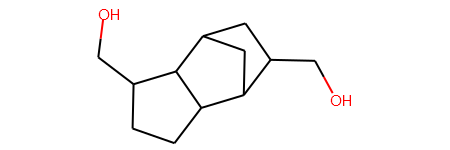

In [25]:
metrics = ['Tanimoto', 'Dice', 'Cosine', 'Sokal', 'Russel', 'Kulczynski', 'McConnaughey'] # TverskySimilarity raises error!
mol_diols = df_diols['smiles'].apply(Chem.MolFromSmiles)
diol_1 = mol_diols['diol_1']
sis = np.array([compute_similarities(diol_1, mol_diols, metric) for metric in metrics]).T
diol_1

In [12]:
df_sis = pd.DataFrame(sis, columns=metrics)
df_sis.index = df_diols.index
df_sis['sum'] = df_sis.sum(axis=1)
df_sis['rank'] = df_sis['sum'].rank(ascending=False)
df_sis

,Tanimoto,Dice,Cosine,Sokal,Russel,Kulczynski,McConnaughey,sum,rank
diol_1,1.000000,1.000000,1.000000,1.000000,0.051270,1.000000,1.000000,6.051270,1.0
diol_2,0.560748,0.718563,0.743637,0.389610,0.029297,0.769585,0.539171,3.750610,2.0
diol_3,0.517730,0.682243,0.682362,0.349282,0.035645,0.682481,0.364963,3.314707,4.0
diol_4,0.364964,0.534759,0.538851,0.223214,0.024414,0.542973,0.085947,2.315122,5.0
diol_5,0.235294,0.380952,0.383326,0.133333,0.017578,0.385714,-0.228571,1.307627,6.0
diol_7,0.121739,0.217054,0.278887,0.064815,0.006836,0.358333,-0.283333,0.764331,8.0
diol_8,0.147619,0.257261,0.259416,0.079692,0.015137,0.261590,-0.476821,0.543894,10.5
diol_9,0.147619,0.257261,0.259416,0.079692,0.015137,0.261590,-0.476821,0.543894,10.5
diol_10,0.124183,0.220930,0.226528,0.066202,0.009277,0.232267,-0.535466,0.343922,12.0
diol_11,0.182482,0.308642,0.323153,0.100402,0.012207,0.338346,-0.323308,0.941923,7.0


In [38]:
def compute_MorganTanimoto(rdkmol, refmol, radius):
    reffp = AllChem.GetMorganFingerprint(refmol, radius)
    fp = AllChem.GetMorganFingerprint(rdkmol, radius)
    return DataStructs.TanimotoSimilarity(reffp, fp)

In [45]:
radii = range(4)
MT_array = np.zeros((len(mol_diols), len(radii)))
for i, radius in enumerate(radii):
    MT_array[:, i] = mol_diols.apply(compute_MorganTanimoto, args=(diol_1, radius))
df_MT = pd.DataFrame(MT_array, columns=radii, index=mol_diols.index)
df_MT['rank_0'] = df_MT[0].rank(ascending=False)
df_MT['rank_1'] = df_MT[1].rank(ascending=False)
df_MT['rank_2'] = df_MT[2].rank(ascending=False)
df_MT

,0,1,2,3,rank_0,rank_1,rank_2
diol_1,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0
diol_2,0.714286,0.500000,0.307692,0.242424,2.0,2.0,2.0
diol_3,0.476190,0.240000,0.160000,0.127660,4.0,4.0,4.0
diol_4,0.190476,0.136364,0.095238,0.078947,7.5,7.5,7.5
diol_5,0.142857,0.090909,0.066667,0.056338,12.0,10.0,10.0
diol_7,0.235294,0.166667,0.117647,0.098361,5.0,5.0,5.0
diol_8,0.153846,0.071429,0.052632,0.043478,10.5,11.5,11.5
diol_9,0.153846,0.071429,0.052632,0.043478,10.5,11.5,11.5
diol_10,0.200000,0.142857,0.101695,0.083333,6.0,6.0,6.0
diol_11,0.571429,0.294118,0.192308,0.153846,3.0,3.0,3.0
